# TP1 MI204 - Features

CARVALHO FRULANE DE SOUZA Daniel 

GALVÃO Mateus

TAULOIS BRAGA Bernardo

## Format d'images et Convolutions

### Importation des libreries pertinentes

In [11]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

### Lecture de l'image en niveau de gris et conversion en float64

(188, 478)
Dimension de l'image : 188 lignes x 478 colonnes


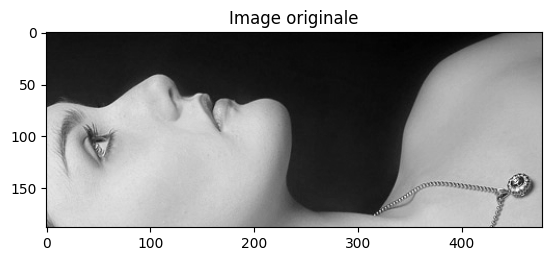

In [12]:
img=np.float64(cv2.imread('Image_Pairs/Face_profile0.jpg', cv2.IMREAD_GRAYSCALE))
print(img.shape)
(h,w) = img.shape
print("Dimension de l'image :",h,"lignes x",w,"colonnes")

# affichage de l'image originale
plt.imshow(img, cmap='gray')
plt.title("Image originale")
plt.show()

### Méthode directe
Application d'un filtre du type sharpening de façon directe. On affiche l'image avec pyplot au lieu d'OpenCV à cause de sa compatibilité avec Jupyter. 

Méthode directe : 0.1556309 s


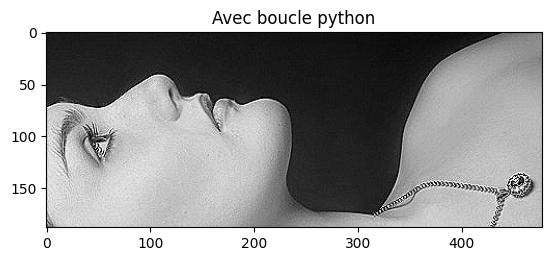

In [13]:
# début de la computation
t1 = cv2.getTickCount() 

# créer une borde autour de l'image
img2 = cv2.copyMakeBorder(img,0,0,0,0,cv2.BORDER_REPLICATE)
for y in range(1,h-1):
  for x in range(1,w-1):
    # application du filtre
    val = 5*img[y, x] - img[y-1, x] - img[y, x-1] - img[y+1, x] - img[y, x+1] 
    img2[y,x] = min(max(val,0),255)

# fin de la computation
t2 = cv2.getTickCount()
time_direct = (t2 - t1)/ cv2.getTickFrequency()
print("Méthode directe :",time_direct,"s")

# affichage de l'image
plt.imshow(img2, cmap='gray')
plt.title("Avec boucle python")
plt.show()

### Méthode filter2D
Application d'une convolution 2D à l'image avec le kernel désiré. On utilise le kernel suivant :
$$
K = 
\begin{pmatrix}
0 & -1 & 0\\ 
-1 & 5 & -1 \\ 
0 & -1 & 0
\end{pmatrix}
$$
On utilise un poids de 5 pour la valeur centrale pour contribuer plus à la sortie. Les valeurs qui l'entournent ont un poids de $-1$ pour mettre en évidence les différences d'intentsité entre le pixel central et ses voisins. Cela entraîne une augmentation de la perception de contraste dans l'image.

Méthode filter2D : 0.0006094 s


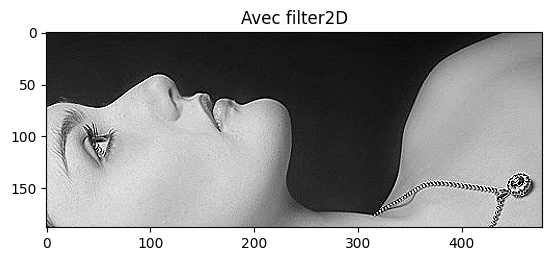

In [14]:
# début de la computation
t1 = cv2.getTickCount()

# définition du kernel et application de la convolution
kernel = np.array([[0, -1, 0],[-1, 5, -1],[0, -1, 0]])
img3 = cv2.filter2D(img,-1,kernel)

# fin de la computation
t2 = cv2.getTickCount()
time_filter2D = (t2 - t1)/ cv2.getTickFrequency()
print("Méthode filter2D :",time_filter2D,"s")

# affichage de l'image
plt.imshow(img3,cmap = 'gray',vmin = 0.0,vmax = 255.0)
plt.title("Avec filter2D")
plt.show()

### Comparaison entre les méthodes
On en observe que les méthodes ont des temps de calcul très différents, vu que la méthode filter2D est beaucoup plus rapide que la méthode directe. On peut en supposer que cela est dû au fait que la bibliothèque qui implémente cette fonction est capable de l'optimiser avec une implémentation plus efficace et la parallélisation, qu'on n'a pas utilisé dans la méthode directe.

La méthode filter2D est 255.38 fois plus rapide que la méthode directe.


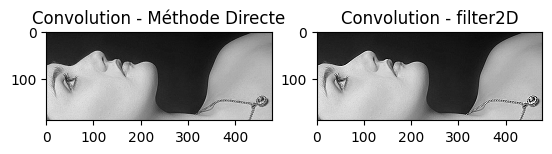

In [15]:
plt.subplot(121)
plt.imshow(img2,cmap = 'gray')
plt.title('Convolution - Méthode Directe')

plt.subplot(122)
plt.imshow(img3,cmap = 'gray',vmin = 0.0,vmax = 255.0)
plt.title('Convolution - filter2D')

print("La méthode filter2D est", "{:.2f}".format(time_direct / time_filter2D), "fois plus rapide que la méthode directe.")

### Gradient de l'image
Pour le calcul du gradient on a utilisé la fonction Sobel, qui compute une approximation du gradient d'une image. Cette fonction utilise un kernel pour calculer la variation de l'image par rapport à $x$ ou à $y$ : 
$$ G_x =
\begin{pmatrix}
-1 & 0 & 1\\ 
-2 & 0 & 2 \\ 
-1 & 0 & 1
\end{pmatrix}
, G_y = 
\begin{pmatrix}
-1 & -2 & -1\\ 
0 & 0 & 0 \\ 
1 & 2 & 1
\end{pmatrix}  $$
Pour bien visualiser les répresentations de $I_x$ et $I_y$, il faut utiliser un gradient de couleur capable de répresenter les valeurs négatives et positives. Ainsi, on a utilisé une échelle qui varie entre le bleu et le rouge centrée en zero.

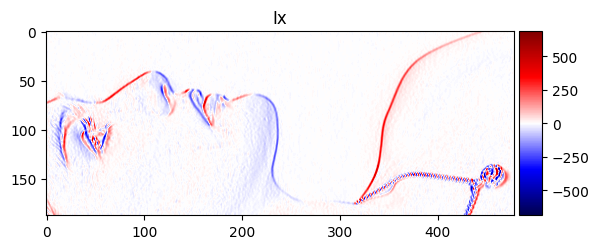

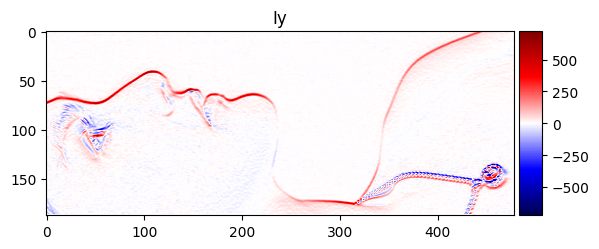

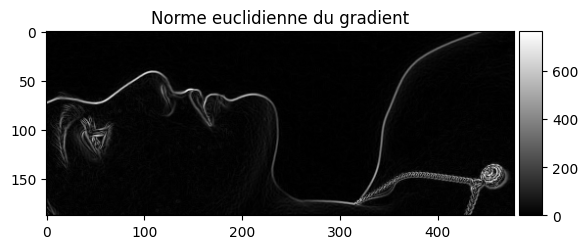

In [16]:
# computation des composants Ix et Iy du gradient
Ix = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
Iy = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

# computation de la norme euclidienne du gradient
grad_norm = np.sqrt(Ix**2 + Iy**2)

# affichage des images
plt.title('Ix')
ax = plt.gca()
im = plt.imshow(Ix, norm=colors.CenteredNorm(), cmap='seismic')
plt.colorbar(im, make_axes_locatable(ax).append_axes("right", size="5%", pad=0.05))
plt.show()

plt.title('Iy')
ax = plt.gca()
im = plt.imshow(Iy, norm=colors.CenteredNorm(), cmap='seismic')
plt.colorbar(im, make_axes_locatable(ax).append_axes("right", size="5%", pad=0.05))
plt.show()

plt.title('Norme euclidienne du gradient')
ax = plt.gca()
im = ax.imshow(grad_norm, cmap='gray')
plt.colorbar(im, make_axes_locatable(ax).append_axes("right", size="5%", pad=0.05))
plt.show()

## Détecteurs